In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import os
import sys
from time import sleep
import STAGATE

In [2]:
dns = os.listdir("../../MIST_Visium_Tumors/")
dns.remove('.DS_Store')
dns

['Human_Breast_Cancer_Ductal_Carcinoma_FFPE',
 'Human_Breast_Cancer_BAS1',
 'Human_Prostate_Cancer_Adenocarcinoma_FFPE',
 'Human_Glioblastoma',
 'Human_Invasive_Ductal_Carcinoma',
 'Human_Prostate_Cancer_Acinar_Cell_Carcinoma_FFPE',
 'Human_Breast_Cancer_BAS2',
 'Human_Ovarian_Cancer',
 'Human_Colorectal_Cancer']

In [4]:
adata = sc.read_visium(f"../../MIST_Visium_Tumors/Human_Breast_Cancer_BAS1")

------Calculating spatial graph...
The graph contains 0 edges, 2518 cells.
0.0000 neighbors per cell on average.
Size of Input:  (2518, 3000)


100%|██████████████████████████████████████████████████████████████████████| 500/500 [00:42<00:00, 11.69it/s]


Human_Breast_Cancer_Ductal_Carcinoma_FFPE 4


Package 'mclust' version 5.4.9
Type 'citation("mclust")' for citing this R package in publications.


------Calculating spatial graph...
The graph contains 0 edges, 3798 cells.
0.0000 neighbors per cell on average.
Size of Input:  (3798, 3000)


100%|██████████████████████████████████████████████████████████████████████| 500/500 [01:29<00:00,  5.57it/s]


Human_Breast_Cancer_BAS1 4


Package 'mclust' version 5.4.9
Type 'citation("mclust")' for citing this R package in publications.


------Calculating spatial graph...
The graph contains 0 edges, 4371 cells.
0.0000 neighbors per cell on average.
Size of Input:  (4371, 3000)


100%|██████████████████████████████████████████████████████████████████████| 500/500 [01:25<00:00,  5.83it/s]


Human_Prostate_Cancer_Adenocarcinoma_FFPE 4


Package 'mclust' version 5.4.9
Type 'citation("mclust")' for citing this R package in publications.


------Calculating spatial graph...
The graph contains 19620 edges, 3468 cells.
5.6574 neighbors per cell on average.
Size of Input:  (3468, 3000)


100%|██████████████████████████████████████████████████████████████████████| 500/500 [01:18<00:00,  6.38it/s]


Human_Glioblastoma 4


Package 'mclust' version 5.4.9
Type 'citation("mclust")' for citing this R package in publications.


------Calculating spatial graph...
The graph contains 0 edges, 4727 cells.
0.0000 neighbors per cell on average.
Size of Input:  (4727, 3000)


100%|██████████████████████████████████████████████████████████████████████| 500/500 [01:51<00:00,  4.48it/s]


Human_Invasive_Ductal_Carcinoma 4


Package 'mclust' version 5.4.9
Type 'citation("mclust")' for citing this R package in publications.


------Calculating spatial graph...
The graph contains 0 edges, 3043 cells.
0.0000 neighbors per cell on average.
Size of Input:  (3043, 3000)


100%|██████████████████████████████████████████████████████████████████████| 500/500 [01:13<00:00,  6.82it/s]


Human_Prostate_Cancer_Acinar_Cell_Carcinoma_FFPE 4


Package 'mclust' version 5.4.9
Type 'citation("mclust")' for citing this R package in publications.


------Calculating spatial graph...
The graph contains 0 edges, 3987 cells.
0.0000 neighbors per cell on average.
Size of Input:  (3987, 3000)


100%|██████████████████████████████████████████████████████████████████████| 500/500 [01:13<00:00,  6.80it/s]


Human_Breast_Cancer_BAS2 4


Package 'mclust' version 5.4.9
Type 'citation("mclust")' for citing this R package in publications.


------Calculating spatial graph...
The graph contains 0 edges, 3493 cells.
0.0000 neighbors per cell on average.
Size of Input:  (3493, 3000)


100%|██████████████████████████████████████████████████████████████████████| 500/500 [01:04<00:00,  7.81it/s]


Human_Ovarian_Cancer 4


Package 'mclust' version 5.4.9
Type 'citation("mclust")' for citing this R package in publications.


------Calculating spatial graph...
The graph contains 18212 edges, 3138 cells.
5.8037 neighbors per cell on average.
Size of Input:  (3138, 3000)


100%|██████████████████████████████████████████████████████████████████████| 500/500 [01:11<00:00,  6.95it/s]


Human_Colorectal_Cancer 4


Package 'mclust' version 5.4.9
Type 'citation("mclust")' for citing this R package in publications.


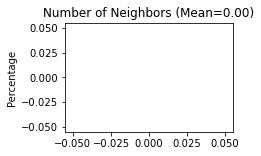

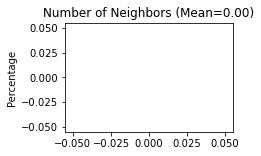

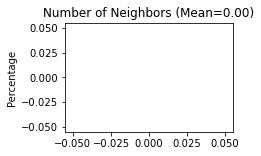

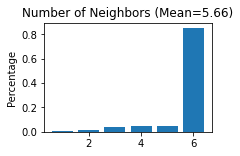

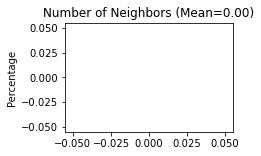

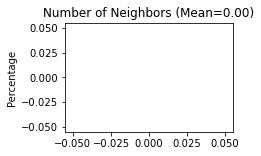

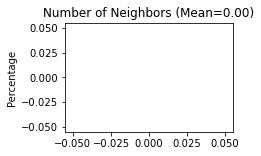

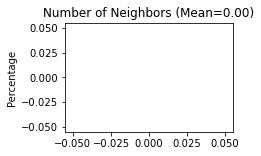

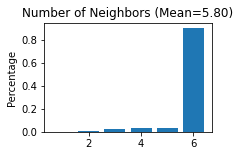

In [19]:
for dn in dns:
    adata = sc.read_visium(f"../../MIST_Visium_Tumors/{dn}")   
    adata.var_names_make_unique()
    sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=3000)
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)    
    STAGATE.Cal_Spatial_Net(adata, rad_cutoff=150)
    STAGATE.Stats_Spatial_Net(adata)
    adata = STAGATE.train_STAGATE(adata, alpha=0)
    STAGATE_df = pd.DataFrame(data=adata.obsm['STAGATE'], index=adata.obs_names)
    
    df = pd.read_csv(f"../cancer_region_detections/results_0722/Human_Breast_Cancer_BAS1/Human_Breast_Cancer_BAS1_MIST_detected.csv")
    n_clust = len(set(df.region_ind))
    input_fn = f"STAGATE_mclust_Visium_Tumors_input/{dn}_STAGATE_obsm.csv"
    STAGATE_df.to_csv(input_fn)
    out_fn = f"STAGATE_mclust_Visium_Tumors_output/{dn}.csv"
    
    cmd = f'Rscript run_mclust.R --inpath {input_fn} --outpath {out_fn} --g {n_clust}'
    print(dn, n_clust)
    os.system(cmd) 

In [18]:
ls STAGATE_mclust_13_output

Human_Breast_Cancer_BAS1.csv
Human_Breast_Cancer_BAS2.csv
Human_Breast_Cancer_Ductal_Carcinoma_FFPE.csv
Human_Colorectal_Cancer.csv
Human_Glioblastoma.csv
Human_Invasive_Ductal_Carcinoma.csv
Human_Ovarian_Cancer.csv
Human_Prostate_Cancer_Acinar_Cell_Carcinoma_FFPE.csv
Human_Prostate_Cancer_Adenocarcinoma_FFPE.csv
